# Лабораторная работа №7. Выполнил Акинин Александр, студент 431 группы

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Вспомогательные функции

In [2]:
# Функция, минимум которой ищут функции в данной программе 
def func(X):
    x1, x2 = X
    return x1**2 - 22*x1 + 2*x2**2 + 28*x2 + 222

# Градиент функции двух переменных
def grad(func, X, eps):
    x1, x2 = X
    res = np.zeros(2)
    res[0] = (func((x1+eps, x2))-func((x1, x2)))/eps
    res[1] = (func((x1, x2+eps))-func((x1, x2)))/eps
    return res

# Норма вектора
def norm(arr):
    return np.sqrt(np.sum(arr**2))

# Вспомогательная функция для того, чтобы сделать график красивым
def level_lines(func, min_max_args):
    x1_min, x1_max, x2_min, x2_max = min_max_args
    X_span = np.linspace(x1_min-1, x1_max+1, 50)
    Y_span = np.linspace(x2_min-1, x2_max+1, 50)
    X, Y = np.meshgrid(X_span, Y_span)
    Z = func((X, Y))
    CS = plt.contour(X, Y, Z, 100)

# Функция создания случайного единичного вектора
def rnd_vect():
    theta = 2*np.pi * np.random.random()
    vect = np.zeros(2)
    vect[0] = np.cos(theta)
    vect[1] = np.sin(theta)
    return vect

# Функция поиска интекса минимального значения в массива
def arg_min(arr):
    i_m, x_m = 0, arr[0]
    for i in range(1, len(arr)):
        if arr[i] < x_m:
            i_m = i
    return i_m

# Градиентный метод с дроблением шага

Градиентный метод нахождения минимума функции $f$ заключется в том, что мы в ходе итераций шагаем в сторону наибольшего уменьшения функции $f$, то есть против направления наибольшего увеличения функции $f$, что является градиентом $\nabla f$.

$$ \vec{x}_{i+1} = \vec{x}_i - \alpha_i\cdot\nabla f(\vec{x}_i) $$

Переменная $\alpha_i$ определяется для каждого шага так, чтобы $f(\vec{x}_{i+1})<f(\vec{x}_{i})$, путем последовательного дробления (деления на некоторое число) этого $\alpha$, пока не будет удволетворено условие $f(\vec{x}_{i+1})<f(\vec{x}_{i})$. 

In [3]:
def grad_method(func, X_init=[0,0], eps=1e-2, debug=False, save=False):
    coeff = 1/3
    func_curr = func(X_init)
    func_prev = func_curr + 1e10
    X = X_init
    history = []
    while abs(func_curr-func_prev) > eps:
        if save: history.append(X)
        gr = grad(func, X, eps)
        
        alpha = 1
        while func(X - alpha*gr) > func_curr:
            alpha *= coeff
        X = X - alpha*gr
        
        func_prev = func_curr
        func_curr = func(X)
        if debug: print(X)
        
    if save: return X, history
    return X

In [4]:
X_init_1 = np.array([0,0])
epsilon_1 = 1e-4
res_1, history_1 = grad_method(func, X_init_1, epsilon_1, debug=False, save=True)

print('Результат градиентного метода с дроблением шага:', res_1)
# print('История градиентного метода с дроблением шага:\n', np.array(history_1))

Результат градиентного метода с дроблением шага: [10.99827343 -6.99898308]


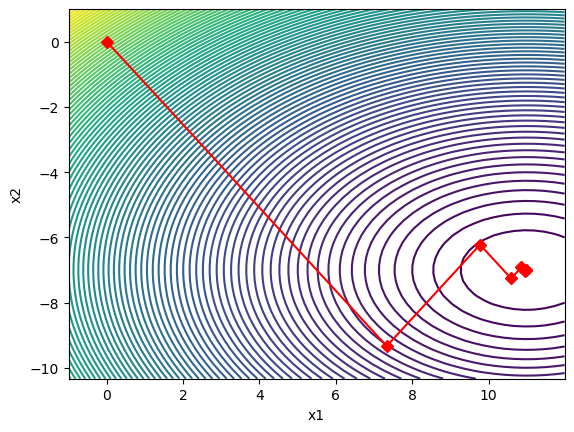

In [5]:
x1_history_1 = [history_1[i][0] for i in range(len(history_1))]
x2_history_1 = [history_1[i][1] for i in range(len(history_1))]
min_max_1 = [min(x1_history_1), max(x1_history_1), min(x2_history_1), max(x2_history_1)]
level_lines(func, min_max_1)

# Создание графика
plt.xlabel('x1'); plt.ylabel('x2')
plt.plot(x1_history_1, x2_history_1, 'Dr-')

# Метод случайного спуска

Метод случайного спуска для нахождения минимума функции $f$ заключется в том, что фиксируется длина шага $r$, в каждой итерации выбирайется случайное направление $\vec{e}_i, |\vec{e}_i| = 1$ и в проверяется, выполняется ли для такого направления условие $f(\vec{x}_i + r\cdot\vec{e}_i) < f(\vec{x}_i)$, и если оно выполняется, то происходит итерация 

$$ \vec{x}_{i+1} = \vec{x}_i + r\cdot\vec{e}_i $$

Если такое условие не выполняется, то цикл начинается заново. Если такое условие не выполняется $N$ раз последовательно, то это значит что мы подошли к минимуму функции достаточно близко для данной точности (величины шага) и возвращается значение последнее значение вектора $\vec{x}_i$.

In [6]:
def random_descent_method(func, X_init, eps=1e-1, n_limit=100, debug=False, save=False):
    X = np.copy(X_init)
    history = []
    n = 0
    while n < n_limit:
        curr_vect = rnd_vect()
        if func(X) > func(X + eps*curr_vect):
            X = X + eps*curr_vect
            n = 0
            if save: history.append(X)
            continue
        n += 1
        
    if save: return X, history
    return X

In [7]:
X_init_2 = np.array([0,0])
res_2, history_2 = random_descent_method(func, X_init_2, debug=False, save=True)

print('Результат случайного спуска:', res_2)
# print('История спуска:\n', np.array(history_2))

Результат случайного спуска: [10.97586532 -6.96133285]


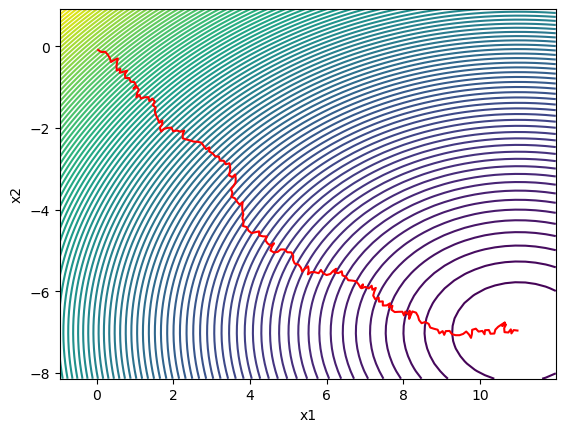

In [8]:
x1_history_2 = [history_2[i][0] for i in range(len(history_2))]
x2_history_2 = [history_2[i][1] for i in range(len(history_2))]
min_max_2 = [min(x1_history_2), max(x1_history_2), min(x2_history_2), max(x2_history_2)]
level_lines(func, min_max_2)

# Создание графика
plt.xlabel('x1'); plt.ylabel('x2')
plt.plot(x1_history_2, x2_history_2, 'r-')

# Метод Нелдера-Мида

Алгоритм метода Нелдера-Мида:
1. Выбрать 3 точки $x_i$, обрадующие симплекс, вычислить для них $f_i = f(x_i)$.

2. Отсортировать симплекс $x_i$ на основе $f_i$ в порядке увеличения и обозначить эти точки как $x_l, x_g, x_h$ соответственно.

3. Вычислить центр масс $x_c$ для точек $x_l$ и $x_g$, $f(x_c)$ вычислять нет необходимости: $$ x_c = \frac{x_l + x_g}{2} $$

4. Отражение: вычисляем $x_r$ и $f(x_r)$: 
$$x_r = (1+\alpha) x_c - \alpha x_h,\ \ \ f_r=f(x_r) $$

5.1. Если $f_r < f_l$, то вычисляем $x_e$ и $f(x_e)$: 
$$ x_e = (1-\gamma)x_c + \gamma x_r,\ \ \ f_e = f(x_e) $$ 

Если $f_e < f_r$, то $x_h = x_e$ и переходим на шаг 9.

Если $f_r < f_e$, то $x_h = x_r$ и переходим на шаг 9.

5.2. Если $f_l < f_r < f_g$, то $x_h = x_r$ и переходим на шаг 9.

5.3. Если $f_g < f_r < f_h$, то меняем местами $x_r$ и $x_h$, меняем местами $f_r$ и $f_h$ и переходим на шаг 6.

5.4. Если $f_h < f_r$, то переходим на шаг 6.

6. Сжатие: вычисляем $x_s$ и $f(x_s)$: 
$$ x_s = \beta x_h + (1-\beta)x_c $$

7. Если $f_s < f_h$, то $x_h = x_s$

8. Если $f_s > f_h$, то  делаем глобальное сжатие: $$ x_{h,g} = x_l + \frac{x_{h,g}-x_l}{2} $$

9. Проверка сходимости

In [9]:
def Nelder_Mead_method(func, method_args=None, bounds=[[-1,1],[-1,1]], eps=1e-1, debug=False, save=True):
        
    if method_args is None:
        alpha, beta, gamma = 1, 0.5, 2
    else:alpha, beta, gamma = method_args
    
    if save: history = []
    
    # Пределы выбора симплекса
    x_bounds, y_bounds = bounds
    x_min, x_max = x_bounds
    y_min, y_max = y_bounds
    
    n = 2
    simplex = np.random.rand(n+1, n)
    simplex[:,0] = x_min + simplex[:,0] * (x_max-x_min)
    simplex[:,1] = y_min + simplex[:,1] * (y_max-y_min)
    
    while True:
        # Значение функций
        f_simplex = np.array([func(X) for X in simplex])
    
        # Сортировка точек на основе значения функции
        i_sorted = np.argsort(f_simplex)
        simplex = simplex[i_sorted]
        f_simplex = f_simplex[i_sorted]
        
        # Центр тяжести X_l и X_g
        X_c = (simplex[0] + simplex[1])/2
        
        # Отражение 
        X_r = (1+alpha)*X_c - alpha*simplex[2]
        f_r = func(X_r)
        
        # Ищем место f_r в ряду f_h, f_g, f_l
        if f_r < f_simplex[0]:
            X_e = (1-gamma)*X_c + gamma*X_r
            f_e = func(X_e)
            
            if f_e < f_r: simplex[2] = X_e
            else: simplex[2] = X_r
                
        elif f_simplex[0] < f_r and f_r < f_simplex[1]: simplex[2] = X_r
        elif f_simplex[1] < f_r and f_r < f_simplex[1]:
            simplex[2], X_r = X_r, simplex[2]
            f_simplex[2], f_r = f_r, f_simplex[2]
            
            #6
            X_s = beta*simplex[2] + (1-beta)*X_c
            f_s = func(X_s)
            if f_s < f_simplex[2]: simplex[2] = X_s
            else:
                simplex[1] = simplex[0] + (simplex[1]-simplex[0])/2
                simplex[2] = simplex[0] + (simplex[2]-simplex[0])/2
        else:
            #6
            X_s = beta*simplex[2] + (1-beta)*X_c
            f_s = func(X_s)
            if f_s < f_simplex[2]: simplex[2] = X_s
            else:
                simplex[1] = simplex[0] + (simplex[1]-simplex[0])/2
                simplex[2] = simplex[0] + (simplex[2]-simplex[0])/2
        
        if debug: print(X_c)
        if save: history.append(X_c)
        
        # Проверка сходимости
        if norm(simplex[0]-simplex[1]) + norm(simplex[1]-simplex[2]) + \
        norm(simplex[2]-simplex[0]) < 3*eps: break
    
    if save: return X_c, history
    return X_c

In [10]:
res_3, history_3 = Nelder_Mead_method(func, debug=False, save=True)

print('Результат метода Нелдера-Мида:', res_2)
# print('История метода Нелдера-Мида:\n', np.array(history_2))

Результат метода Нелдера-Мида: [10.97586532 -6.96133285]


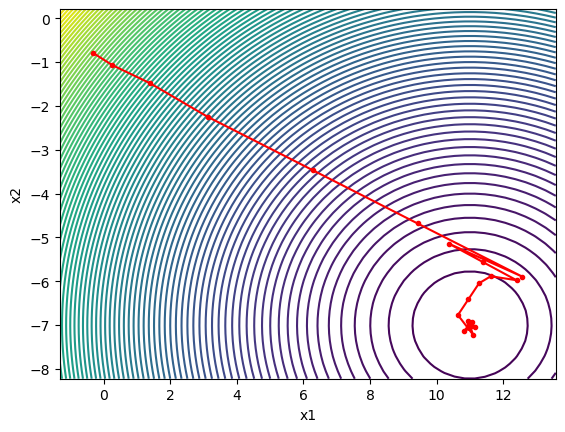

In [11]:
x1_history_3 = [history_3[i][0] for i in range(len(history_3))]
x2_history_3 = [history_3[i][1] for i in range(len(history_3))]
min_max_3 = [min(x1_history_3), max(x1_history_3), min(x2_history_3), max(x2_history_3)]
level_lines(func, min_max_3)

# Создание графика
plt.xlabel('x1'); plt.ylabel('x2')
plt.plot(x1_history_3, x2_history_3, 'r.-')

# Метод Хука-Дживса

На начальном этапе задаётся стартовая точка $\vec{x}_0$ и шаги $\vec{h}_x,\ \vec{h}_y$ по координатам. 

Затем замораживаем значения функции в точках $\vec{x}_0+\vec{h}_x$ и $\vec{x}_0-\vec{h}_x$ и переходим в точку $\vec{x}_1$ с наименьшим значением функции. В этой точке вычисляем значения функции в точках $\vec{x}_1+\vec{h}_y$ и $\vec{x}_1-\vec{h}_y$ и, переходим в точку с наименьшим значением функции (и дальше для многомерного случая).

В случае, если для какой-нибудь координаты значение в исходной точке меньше, чем значения для обоих направлений шага, то шаг по этой координате уменьшается. 

Когда размеры шагов по всем координатам $\vec{h}_x, \vec{h}_y$ станут меньше $\delta$, алгоритм завершается, и точка $\vec{x}_i$ точкой минимума. 

In [12]:
def Hooke_Jeeves_method(func, X_0, eps=1e-3, delta=1e-2, debug=False, save=False):
    alpha = 1/2
    
    # Создание переменных шага по осям
    h = 5
    h_x, h_y = np.array([h,0]), np.array([0,h])
    
    # Созание переменных точки и функции точки
    X, f_curr = np.copy(X_0), func(X_0)
    
    if save: history = []
    
    i = 0
    while True:
        X_neigh = []
        X_prev = np.copy(X)
        
        # Создание массива для соседства точек Х
        if i%2==0:
            X_neigh.append(X)
            X_neigh.append(X+h_x)
            X_neigh.append(X-h_x)
        else:
            X_neigh.append(X)
            X_neigh.append(X+h_y)
            X_neigh.append(X-h_y)
        
        # Расчёт значения функции в этих точках и нахождение минимального значения функции
        f = [func(x) for x in X_neigh]
        f_min = min(f)
        
        # Поиск той точки, которая является "минимальной" из соседства
        # Если минимальная по центру - уменьшение шага
        if i%2==0:
            if f[0] == f_min:
                h_x = h_x * alpha
                continue
            elif f[1] == f_min: X = X+h_x
            else: X = X-h_x
        else:
            if f[0] == f_min:
                h_y = h_y * alpha
                continue
            elif f[1] == f_min: X = X+h_y*alpha
            else: X = X-h_y*alpha
        
        f_prev, f_curr = f_curr, func(X)
        
        if debug: print(X)
        if save: history.append(X)
        
        # Сходимость
        if abs(f_prev-f_curr) < eps and norm(h_x) < delta and norm(h_y) < delta: break
            
        i += 1
            
    if save: return X, history
    return X

In [13]:
X_init_5 = np.array([0,0])
res_5, history_5 = Hooke_Jeeves_method(func, X_init_5, debug=False, save=True)

print('Результат метода Хука-Дживса:', res_5)
# print('История метода Хука-Дживса:\n', np.array(history_5))

Результат метода Хука-Дживса: [11.00097656 -6.99707031]


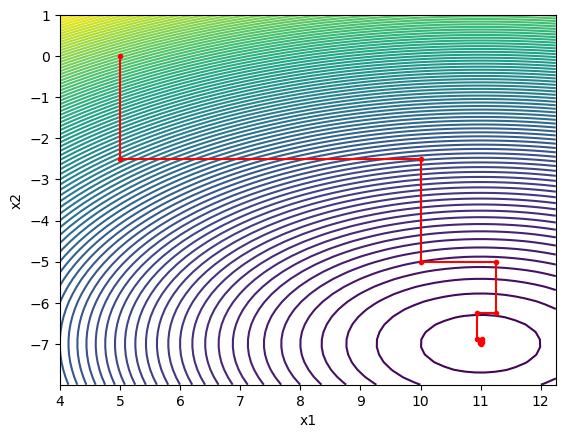

In [14]:
x1_history_5 = [history_5[i][0] for i in range(len(history_5))]
x2_history_5 = [history_5[i][1] for i in range(len(history_5))]
min_max_5 = [min(x1_history_5), max(x1_history_5), min(x2_history_5), max(x2_history_5)]
level_lines(func, min_max_5)

# Создание графика
plt.xlabel('x1'); plt.ylabel('x2')
plt.plot(x1_history_5, x2_history_5, 'r.-')